## Set up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load summary metrics file
summary_df = pd.read_csv('../data/derived/performance/summary.csv')

In [3]:
# preview dataframe
summary_df.sample(5)

,model_name,dataset_name,vector_name,hyperparameter_name,hyperparameter_value,metric_name,metric_value
611,svc,dev,count,c,4,micro_precision,0.896626
143,mlp,dev,tfidf,alpha,0.0001,false_negatives,81.000000
358,mlp,dev,tfidf,alpha,1,micro_recall,0.877961
69,mlp,dev,count,alpha,0.01,binary_f1,0.856634
121,mlp,dev,tfidf,alpha,0.01,micro_precision,0.893037


## Visualize

In [4]:
metric_name = 'accuracy'
vector_name = 'count'
dataset_name = 'train'
model_name = 'mlp'

# copy summary dataframe before filtering records
df = summary_df.copy()

# visualize performance for one metric, model, dataset, and vector type
df = df[df['metric_name'] == metric_name]
#df = df[df['dataset_name'] == dataset_name]
#df = df[df['vector_name'] == vector_name]
df = df[df['model_name'] == model_name]

# reset indices
df.reset_index(inplace=True, drop=True)

# sort by hyperparameter value
df.sort_values(by='hyperparameter_value', inplace=True)

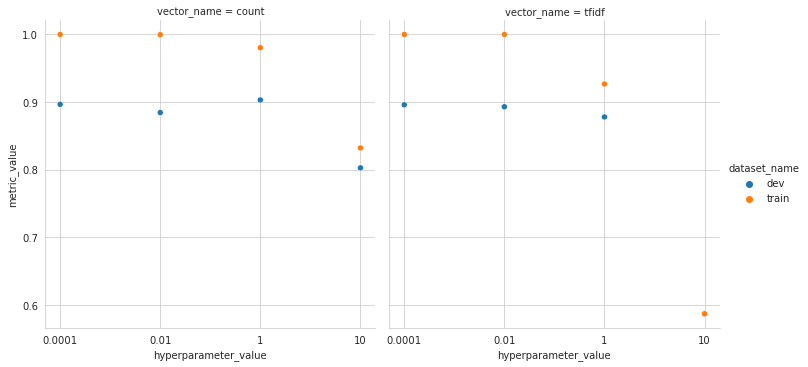

In [5]:
sns.set_style("whitegrid")
sns.relplot(data=df, x='hyperparameter_value', y='metric_value', hue='dataset_name', col='vector_name')